# APS1070
#### Basic Principles and Models - Project 1
**Deadline: Sep 27, 23:59 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.






**Name:** **Haoying Sun**

**Student ID:** **1002112108**

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

# ***NOTE: All discussion questions are answered in italics.***



## Part 1: Getting started [4 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* **How many features do we have in this dataset?** 

*-> There are 30 features (columns) in this dataset, which is everything in "feature_names".*

* **What are the target classes?** 

*-> The target data is either 0 or 1.*

* ***What do these target classes signify? ***

*-> 0 signifies malignant, and 1 signifies benign (as defined in the dictionary under taget_names).*

* ***How many participants tested `Malignant`? ***

*-> 212 participants are tested malignant.*

* ***How many participants tested `Benign`? ***

*-> 357 participants are tested benign.*

In [ ]:
import numpy as np
import sklearn
import pandas as pd

In [ ]:
#Creating the dataframe 
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
target_list = dataset['target'].tolist()
df['target']=target_list
df



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
#Creating a separate datafram for all features, which will be used for trial-and-error
df_features = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
#df_features

In [ ]:
#Checking how many features do we have
print(df_features.shape)

(569, 30)


In [ ]:
#Counting the number of benign cases (the number of 1)
occurences_benign = np.count_nonzero(df['target']==1)
print("The number of benign cases is: ", occurences_benign)

#Counting the number of malignant cases (the number of 0)
num_zeros = (df['target'] == 0).sum()
print("The number of malignant cases is: ", num_zeros)

The number of benign cases is:  357
The number of malignant cases is:  212


Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**


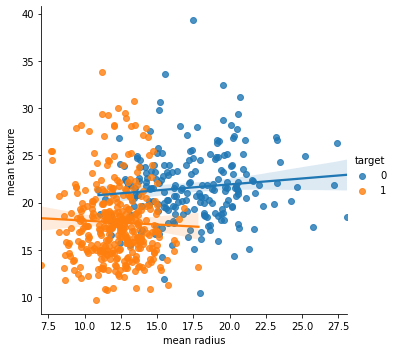

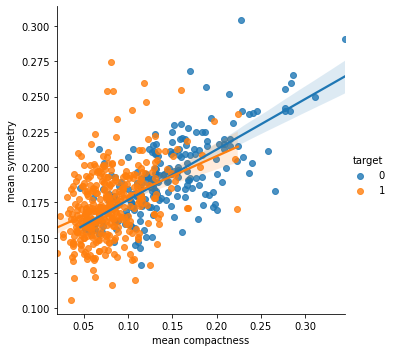

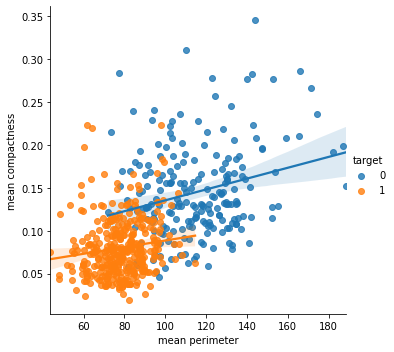

In [ ]:
#Plotting mean texture vs. mean radius, mean compactness vs. mean symmetry
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x="mean radius", y="mean texture", hue = 'target',data=df)
sns.lmplot(x="mean compactness", y="mean symmetry", hue = 'target',data=df)

#Plotting mean perimeter vs. mean compactness (features with 2 very differnt scales)
sns.lmplot(x="mean perimeter", y="mean compactness", hue = 'target',data=df)

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]**

*The plot before standardization and the plot after standardization are the same. Personally thinking, one reason is that seaborn and matplotlib automatically adjust the scale if the scale of x and y are drastically different, in order to facilitate a better visualization. Another reason is that, this dataset is a breast cancer dataset, which means it is a natural dataset. Most natural datasets have a normal distribution. Therefore, with a decent number of datapoints in this dataset, the data distribution could be really close to normal distribution, and thus its plot may not undergo big changes after standardization.*

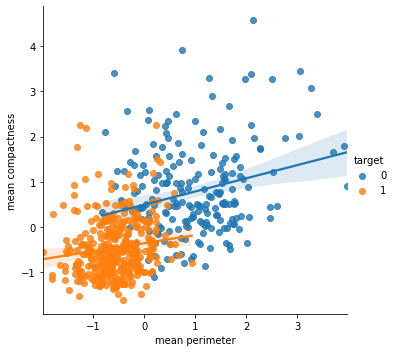

In [ ]:
#Standardize the dataset except target then re-plot
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(df)
scaled_df_notarget = np.delete(scaled_df, -1, 1)
df2 = pd.DataFrame(scaled_df_notarget, columns=dataset['feature_names'])
target_list = dataset['target'].tolist()
df2['target']=target_list
sns.lmplot(x="mean perimeter", y="mean compactness", hue = 'target',data=df2)

It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**

In [ ]:
#Splitting the original dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, target_list, test_size=0.3, random_state=0)

## Part 2: KNN Classifier without Standardization [3 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**



1 91.7120253164557
2 91.70886075949367
3 92.72151898734178
4 92.71202531645571
5 91.9620253164557
6 92.46518987341773
7 93.21518987341773
8 93.21518987341773
9 92.46202531645568
10 93.46518987341771
11 93.46518987341771
12 93.2120253164557
13 92.21518987341773
14 92.96835443037976
15 92.21518987341773
16 92.46202531645568
17 91.20569620253164
18 91.95886075949367
19 91.20886075949369
20 91.45886075949366
21 90.70253164556962
22 90.95253164556961
23 90.70569620253166
24 90.70253164556961
25 90.45253164556962
26 90.95569620253163
27 90.95569620253163
28 90.95569620253163
29 90.95569620253163
30 90.95569620253163
31 90.45569620253164
32 90.70569620253166
33 90.70569620253166
34 90.95569620253166
35 90.95569620253166
36 90.70569620253164
37 90.70569620253166
38 90.95569620253166
39 90.95569620253166
40 90.95569620253166
41 90.70569620253166
42 90.95569620253166
43 90.95569620253166
44 90.95569620253166
45 90.20569620253166
46 90.70569620253166
47 90.20253164556962
48 90.95569620253166
49 9

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors')

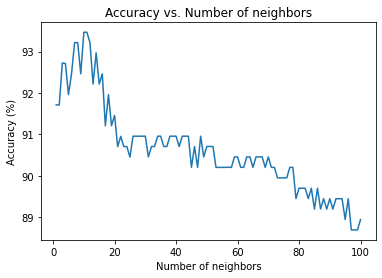

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

acc_max = 0
k_max = 0

#for loop to sweep k from 1 to 100
accuracy = np.zeros(100)
k = np.arange(1,101,1)
for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train, y_train)
  scores = cross_val_score(knn, X_train, y_train, cv=5)
  accuracy[i] = scores.mean()*100
  print(i+1, accuracy[i])
  if accuracy[i] > acc_max:
    acc_max = accuracy[i]
    k_max = i+1

print("The optimal k value is: ", k_max,".", "The maximum accuracy is: ", acc_max, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors")


  

2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models. **[1]**

*The best k value is 10. The maximum accuracy is 93.47.*
*For k values <10, the model overfits because with a smaller number of neighbors taken into consideration the accuracy decreases.*
*For k values >10, the model underfits because with a bigger number of neighbors taken into consideration the accuracy decreases.*

3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4). 
Describe your findings using a graph or table (or multiple!). **[1]**

*I was able to get roughly the same accuracy with fewer features by trial-and-error. **The results are summarized in Table1 below**. 5 combinations were examined, each one representing one or more different features removed. It is observed that as the number of features removed increases, the train accuracy decreases. The threshold for the number of features removed seems to be 2. Once more than 2 features are removed, the train accuracy decreases. Moreover, features that depict the physiological characteristics of the tumor (e.g. mean texture, mean area, mean compactness, etc.) play a critical role in predicting if the tumor is malignant or not. They should not be removed if we want to achieve a high accuracy.*

In [ ]:
#Creating a summary table

from prettytable import PrettyTable

table1 = PrettyTable()
table1.field_names = ["Removed Feature(s)", "Optimal k", "Maximum Training Accuracy (%)"]
table1.add_row(["None", 10, 93.47])
table1.add_row(["Mean Symmetry", 10, 93.47])
table1.add_row(["Mean Concave Points", 10, 93.47])
table1.add_row(["Fractal Dimension Error, Worst Concavity", 10, 93.47])
table1.add_row(["Mean Texture, Mean area, Mean Compactness", 34, 91.46])
table1.add_row(["Worst Smoothness, Worst Compactness, Worst Symmetry, Worst Area", 1, 92.21])

print(table1)


+-----------------------------------------------------------------+-----------+-------------------------------+
|                        Removed Feature(s)                       | Optimal k | Maximum Training Accuracy (%) |
+-----------------------------------------------------------------+-----------+-------------------------------+
|                               None                              |     10    |             93.47             |
|                          Mean Symmetry                          |     10    |             93.47             |
|                       Mean Concave Points                       |     10    |             93.47             |
|             Fractal Dimension Error, Worst Concavity            |     10    |             93.47             |
|            Mean Texture, Mean area, Mean Compactness            |     34    |             91.46             |
| Worst Smoothness, Worst Compactness, Worst Symmetry, Worst Area |     1     |             92.21       

1 91.7120253164557
2 91.70886075949367
3 92.72151898734178
4 92.71202531645571
5 91.9620253164557
6 92.46518987341773
7 93.21518987341773
8 93.21518987341773
9 92.46202531645568
10 93.46518987341771
11 93.46518987341771
12 93.2120253164557
13 92.21518987341773
14 92.96835443037976
15 92.21518987341773
16 92.46202531645568
17 91.20569620253164
18 91.95886075949367
19 91.20886075949369
20 91.45886075949366
21 90.70253164556962
22 90.95253164556961
23 90.70569620253166
24 90.70253164556961
25 90.45253164556962
26 90.95569620253163
27 90.95569620253163
28 90.95569620253163
29 90.95569620253163
30 90.95569620253163
31 90.45569620253164
32 90.70569620253166
33 90.70569620253166
34 90.95569620253166
35 90.95569620253166
36 90.70569620253164
37 90.70569620253166
38 90.95569620253166
39 90.95569620253166
40 90.95569620253166
41 90.70569620253166
42 90.95569620253166
43 90.95569620253166
44 90.95569620253166
45 90.20569620253166
46 90.70569620253166
47 90.20253164556962
48 90.95569620253166
49 9

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without mean symmetry)')

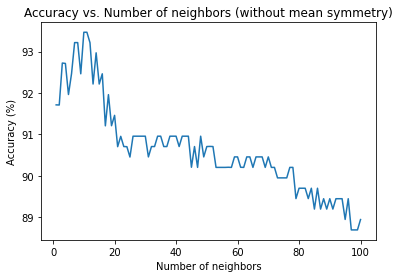

In [ ]:
#Reducing dataset

#Drop mean symmetry
X_train_nosym = X_train.drop(['mean symmetry'], axis=1)

#Train
acc_max_nosym = 0
k_max_nosym = 0

 #for loop to sweep k from 1 to 100
accuracy_nosym = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train_nosym, y_train)
  scores_nosym = cross_val_score(knn, X_train_nosym, y_train, cv=5)
  accuracy_nosym[i] = scores_nosym.mean()*100
  print(i+1, accuracy_nosym[i])
  if accuracy_nosym[i] > acc_max_nosym:
    acc_max_nosym = accuracy_nosym[i]
    k_max_nosym = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_nosym,".", "The maximum accuracy is: ", acc_max_nosym, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_nosym)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without mean symmetry)")

1 91.7120253164557
2 91.70886075949367
3 92.72151898734178
4 92.71202531645571
5 91.9620253164557
6 92.46518987341773
7 93.21518987341773
8 93.21518987341773
9 92.46202531645568
10 93.46518987341771
11 93.46518987341771
12 93.2120253164557
13 92.21518987341773
14 92.96835443037976
15 92.21518987341773
16 92.46202531645568
17 91.20569620253164
18 91.95886075949367
19 91.20886075949369
20 91.45886075949366
21 90.70253164556962
22 90.95253164556961
23 90.70569620253166
24 90.70253164556961
25 90.45253164556962
26 90.95569620253163
27 90.95569620253163
28 90.95569620253163
29 90.95569620253163
30 90.95569620253163
31 90.45569620253164
32 90.70569620253166
33 90.70569620253166
34 90.95569620253166
35 90.95569620253166
36 90.70569620253164
37 90.70569620253166
38 90.95569620253166
39 90.95569620253166
40 90.95569620253166
41 90.70569620253166
42 90.95569620253166
43 90.95569620253166
44 90.95569620253166
45 90.20569620253166
46 90.70569620253166
47 90.20253164556962
48 90.95569620253166
49 9

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without mean concave points)')

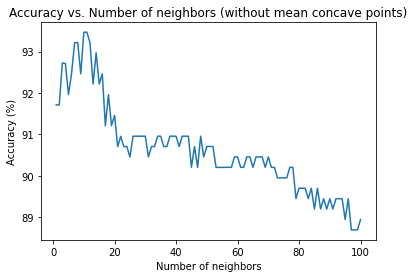

In [ ]:
#Drop mean concave points
X_train_noconcavept = X_train.drop(['mean concave points'], axis=1)

#Train
acc_max_noconcavept = 0
k_max_noconcavept = 0

 #for loop to sweep k from 1 to 100
accuracy_noconcavept = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train_noconcavept, y_train)
  scores_noconcavept = cross_val_score(knn, X_train_noconcavept, y_train, cv=5)
  accuracy_noconcavept[i] = scores_noconcavept.mean()*100
  print(i+1, accuracy_noconcavept[i])
  if accuracy_noconcavept[i] > acc_max_noconcavept:
    acc_max_noconcavept = accuracy_noconcavept[i]
    k_max_noconcavept = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_noconcavept,".", "The maximum accuracy is: ", acc_max_noconcavept, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_noconcavept)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without mean concave points)")

1 91.7120253164557
2 91.70886075949367
3 92.72151898734178
4 92.71202531645571
5 91.9620253164557
6 92.46518987341773
7 93.21518987341773
8 93.21518987341773
9 92.46202531645568
10 93.46518987341771
11 93.46518987341771
12 93.2120253164557
13 92.21518987341773
14 92.96835443037976
15 92.21518987341773
16 92.46202531645568
17 91.20569620253164
18 91.95886075949367
19 91.20886075949369
20 91.45886075949366
21 90.70253164556962
22 90.95253164556961
23 90.70569620253166
24 90.70253164556961
25 90.45253164556962
26 90.95569620253163
27 90.95569620253163
28 90.95569620253163
29 90.95569620253163
30 90.95569620253163
31 90.45569620253164
32 90.70569620253166
33 90.70569620253166
34 90.95569620253166
35 90.95569620253166
36 90.70569620253164
37 90.70569620253166
38 90.95569620253166
39 90.95569620253166
40 90.95569620253166
41 90.70569620253166
42 90.95569620253166
43 90.95569620253166
44 90.95569620253166
45 90.20569620253166
46 90.70569620253166
47 90.20253164556962
48 90.95569620253166
49 9

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without fractal dimension error and worst concavity)')

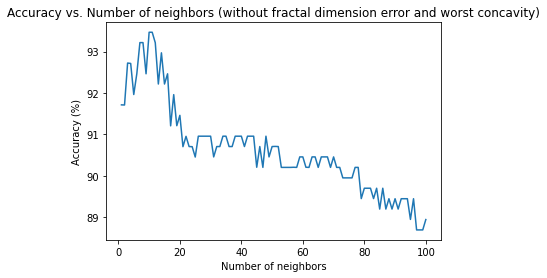

In [ ]:
#Drop fractal dimension error and worst concavity
X_train_frac_con = X_train.drop(['fractal dimension error','concavity error'], axis=1)

#Train
acc_max_frac_con = 0
k_max_frac_con = 0

 #for loop to sweep k from 1 to 100
accuracy_frac_con = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train_frac_con, y_train)
  scores_frac_con = cross_val_score(knn, X_train_frac_con, y_train, cv=5)
  accuracy_frac_con[i] = scores_frac_con.mean()*100
  print(i+1, accuracy_frac_con[i])
  if accuracy_frac_con[i] > acc_max_frac_con:
    acc_max_frac_con = accuracy_frac_con[i]
    k_max_frac_con = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_frac_con,".", "The maximum accuracy is: ", acc_max_frac_con, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_frac_con)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without fractal dimension error and worst concavity)")

1 89.44303797468353
2 88.18987341772151
3 89.44620253164557
4 89.18037974683544
5 90.43987341772151
6 89.69303797468355
7 89.69303797468355
8 89.94303797468355
9 89.69303797468355
10 90.19620253164558
11 89.94303797468355
12 89.18987341772151
13 89.94620253164557
14 89.94303797468355
15 89.69303797468355
16 89.94303797468355
17 90.45253164556962
18 89.69303797468355
19 90.45253164556962
20 90.70253164556962
21 90.45253164556962
22 91.20569620253164
23 90.70569620253166
24 90.70253164556962
25 90.95569620253166
26 90.70253164556962
27 90.95569620253166
28 90.95569620253166
29 90.95569620253166
30 90.70253164556962
31 90.70253164556962
32 90.95569620253166
33 91.20886075949369
34 91.45886075949366
35 90.95569620253166
36 90.95569620253166
37 90.95569620253166
38 90.95569620253166
39 90.95569620253166
40 90.95569620253166
41 90.95569620253166
42 90.4493670886076
43 90.95569620253166
44 90.95569620253166
45 90.95569620253166
46 91.20569620253164
47 91.20569620253164
48 91.20569620253164
49

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without mean texture, mean area and mean compactness)')

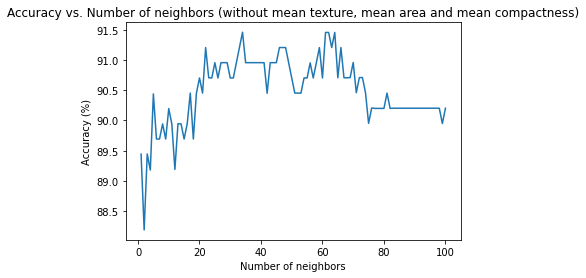

In [ ]:
#Drop mean texture, mean area and mean compactness
X_train_tex_area_com = X_train.drop(['mean texture','mean area','mean compactness'], axis=1)

#Train
acc_max_tex_area_com = 0
k_max_tex_area_com = 0

 #for loop to sweep k from 1 to 100
accuracy_tex_area_com = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train_tex_area_com, y_train)
  scores_tex_area_com = cross_val_score(knn, X_train_tex_area_com, y_train, cv=5)
  accuracy_tex_area_com[i] = scores_tex_area_com.mean()*100
  print(i+1, accuracy_tex_area_com[i])
  if accuracy_tex_area_com[i] > acc_max_tex_area_com:
    acc_max_tex_area_com = accuracy_tex_area_com[i]
    k_max_tex_area_com = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_tex_area_com,".", "The maximum accuracy is: ", acc_max_tex_area_com, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_tex_area_com)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without mean texture, mean area and mean compactness)")

1 92.21202531645571
2 90.45886075949367
3 91.21518987341773
4 91.2120253164557
5 90.2120253164557
6 90.95569620253166
7 89.20253164556962
8 90.21518987341771
9 88.70253164556962
10 89.45569620253163
11 88.6993670886076
12 89.20569620253164
13 88.95253164556962
14 88.94936708860757
15 88.94936708860757
16 89.45253164556961
17 88.94936708860757
18 89.1993670886076
19 88.19620253164558
20 88.44936708860762
21 87.94303797468356
22 88.44936708860759
23 88.19620253164558
24 88.19620253164558
25 88.19620253164558
26 88.19620253164558
27 87.94620253164555
28 87.94620253164555
29 88.19936708860759
30 88.19936708860759
31 87.94620253164555
32 88.95253164556962
33 88.45253164556961
34 88.70253164556962
35 88.19936708860759
36 88.44620253164557
37 88.44936708860759
38 88.19620253164558
39 87.69303797468355
40 88.19303797468353
41 87.94303797468356
42 88.44303797468355
43 87.94303797468356
44 88.19303797468356
45 88.44936708860759
46 88.19303797468353
47 88.44620253164557
48 88.18987341772151
49 88

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)')

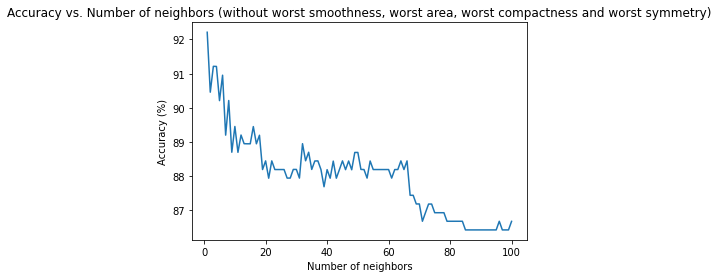

In [ ]:
#Drop worst smoothness, worst compactness, worst symmetry, worst area
X_train_scsa = X_train.drop(['worst smoothness','worst compactness','worst symmetry','worst area'], axis=1)

#Train
acc_max_scsa= 0
k_max_scsa = 0

 #for loop to sweep k from 1 to 100
accuracy_scsa = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train_scsa, y_train)
  scores_scsa = cross_val_score(knn, X_train_scsa, y_train, cv=5)
  accuracy_scsa[i] = scores_scsa.mean()*100
  print(i+1, accuracy_scsa[i])
  if accuracy_scsa[i] > acc_max_scsa:
    acc_max_scsa = accuracy_scsa[i]
    k_max_scsa = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_scsa,".", "The maximum accuracy is: ", acc_max_scsa, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_scsa)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)")

## Part 3: Standardization [2 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2. **[1]**



In [ ]:
table2 = PrettyTable()

table2.field_names = ["Removed Feature(s)", "Optimal k", "Maximum Training Accuracy (%)"]
table2.add_row(["None", 10, 96.74])
table2.add_row(["Texture Error, Compactness Error", 8, 96.74])
table2.add_row(["Worst Smoothness, Worst Compactness, Worst Area", 10, 96.49])
table2.add_row(["Radius Error, Area error, Smoothness Error", 8, 96.74])
table2.add_row(["Texture Error, Compactness Error, Concavity Error, Concave Points Error", 8, 96.74])
table2.add_row(["Texture Error, Compactness error, Concavity error, Fractal Dimension Error", 10, 96.74])

print(table2)

+----------------------------------------------------------------------------+-----------+-------------------------------+
|                             Removed Feature(s)                             | Optimal k | Maximum Training Accuracy (%) |
+----------------------------------------------------------------------------+-----------+-------------------------------+
|                                    None                                    |     10    |             96.74             |
|                      Texture Error, Compactness Error                      |     8     |             96.74             |
|              Worst Smoothness, Worst Compactness, Worst Area               |     10    |             96.49             |
|                 Radius Error, Area error, Smoothness Error                 |     8     |             96.74             |
|  Texture Error, Compactness Error, Concavity Error, Concave Points Error   |     8     |             96.74             |
| Texture Error,

In [ ]:
#Standardizing the entire training dataset
scaled_X_train = StandardScaler().fit_transform(X_train)
df_sd_train = pd.DataFrame(scaled_X_train, columns=dataset['feature_names'])


#Standardizing the entire testing dataset
scaler = StandardScaler().fit(X_train)
scaled_X_test = scaler.transform(X_test)
df_sd_test =  pd.DataFrame(scaled_X_test, columns=dataset['feature_names'])


1 95.22468354430377
2 94.4746835443038
3 96.23734177215188
4 96.23734177215188
5 95.22784810126582
6 95.48101265822785
7 96.49367088607596
8 96.49367088607596
9 95.98417721518986
10 96.74367088607593
11 96.49050632911391
12 96.24050632911393
13 95.99050632911393
14 96.24050632911393
15 95.48417721518987
16 95.23417721518987
17 94.98417721518987
18 95.23417721518987
19 94.73101265822784
20 94.98101265822785
21 94.98101265822785
22 95.23417721518987
23 94.98417721518987
24 94.98417721518987
25 95.23417721518987
26 95.2373417721519
27 94.2278481012658
28 95.48734177215191
29 94.73101265822784
30 95.2373417721519
31 94.22468354430379
32 94.73101265822784
33 94.72784810126582
34 94.73101265822784
35 94.47784810126582
36 94.98417721518987
37 94.72784810126582
38 94.47784810126582
39 94.4746835443038
40 94.72784810126582
41 94.22151898734178
42 94.22151898734178
43 93.97151898734177
44 93.97151898734177
45 93.97151898734177
46 93.97151898734177
47 93.97151898734177
48 93.97151898734177
49 93.

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors')

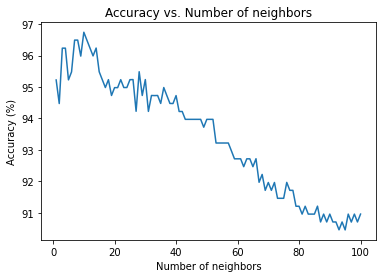

In [ ]:
acc_max_pt3 = 0
k_max3_pt3 = 0
accuracy_pt3 = np.zeros(100)

#for loop to sweep k from 1 to 100

k = np.arange(1,101,1)
for i in range (0,100):
  knn_sd = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn_sd.fit(scaled_X_train, y_train)
  scores_pt3 = cross_val_score(knn_sd, scaled_X_train, y_train, cv=5)
  accuracy_pt3[i] = scores_pt3.mean()*100
  print(i+1, accuracy_pt3[i])
  if accuracy_pt3[i] > acc_max_pt3:
    acc_max_pt3 = accuracy_pt3[i]
    k_max_pt3 = i+1

print("The optimal k value is: ", k_max_pt3,".", "The maximum accuracy is: ", acc_max_pt3, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_pt3)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors")


1 94.72151898734177
2 94.72784810126582
3 96.74050632911391
4 96.74050632911391
5 96.24050632911393
6 96.24050632911393
7 96.24050632911393
8 96.74683544303797
9 96.49050632911391
10 96.74683544303797
11 96.74367088607593
12 96.49367088607596
13 96.24050632911393
14 96.24050632911393
15 95.98734177215191
16 95.99050632911393
17 95.7373417721519
18 95.99050632911393
19 95.7373417721519
20 95.7373417721519
21 95.7373417721519
22 95.7373417721519
23 95.2373417721519
24 95.99050632911393
25 94.98417721518987
26 95.23417721518987
27 94.98417721518987
28 95.48734177215191
29 94.73417721518986
30 95.2373417721519
31 94.98417721518987
32 94.98417721518987
33 94.98417721518987
34 95.2373417721519
35 95.2373417721519
36 95.2373417721519
37 95.2373417721519
38 95.2373417721519
39 95.2373417721519
40 95.2373417721519
41 94.98417721518987
42 95.2373417721519
43 94.98101265822785
44 95.48734177215191
45 94.72468354430379
46 94.72784810126582
47 94.4746835443038
48 94.22468354430379
49 94.22468354430

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)')

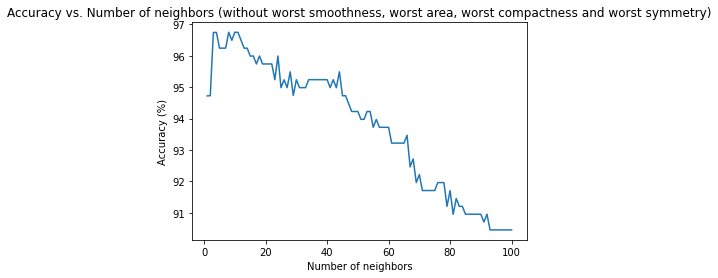

In [ ]:
#Drop texture error, compactness error
scaled_X_train_tc = np.delete(scaled_X_train, [11,15], axis=1)

#Train
acc_max_tc= 0
k_max_tc = 0

 #for loop to sweep k from 1 to 100
accuracy_tc = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(scaled_X_train_tc, y_train)
  scores_tc = cross_val_score(knn, scaled_X_train_tc, y_train, cv=5)
  accuracy_tc[i] = scores_tc.mean()*100
  print(i+1, accuracy_tc[i])
  if accuracy_tc[i] > acc_max_tc:
    acc_max_tc = accuracy_tc[i]
    k_max_tc = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_tc,".", "The maximum accuracy is: ", acc_max_tc, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_tc)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)")

1 95.48101265822785
2 94.47784810126582
3 95.74050632911393
4 95.23101265822784
5 95.98734177215191
6 95.48417721518987
7 95.98734177215191
8 95.9873417721519
9 96.23734177215188
10 96.49367088607596
11 96.49367088607596
12 96.49367088607596
13 95.48734177215191
14 95.48734177215191
15 95.23417721518987
16 95.99050632911393
17 95.99367088607596
18 95.99367088607596
19 95.2373417721519
20 95.74050632911393
21 95.48734177215191
22 95.48734177215191
23 95.48734177215191
24 95.74050632911393
25 95.48734177215191
26 95.74050632911393
27 95.48734177215191
28 95.48734177215191
29 95.48734177215191
30 95.48734177215191
31 95.48734177215191
32 95.74050632911393
33 95.48734177215191
34 95.74050632911393
35 95.7373417721519
36 95.48734177215191
37 95.7373417721519
38 95.7373417721519
39 94.97784810126582
40 94.97784810126582
41 94.97784810126582
42 94.97784810126582
43 94.72468354430379
44 94.97784810126582
45 94.4746835443038
46 94.72468354430379
47 94.47151898734177
48 94.47151898734177
49 93.9

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)')

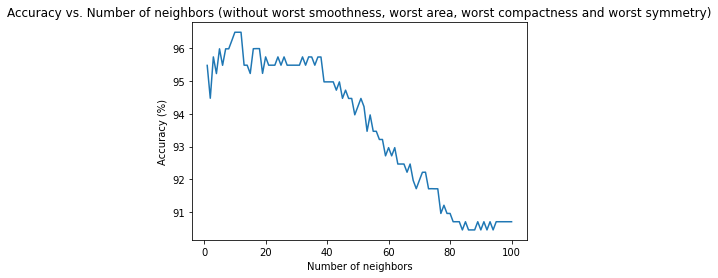

In [ ]:
#Drop worst smoothness, worst compactness, worst area
scaled_X_train_scsa = np.delete(scaled_X_train, [23,24,25], axis=1)


#Train
acc_max_scsa= 0
k_max_scsa = 0

 #for loop to sweep k from 1 to 100
accuracy_scsa = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(scaled_X_train_scsa, y_train)
  scores_scsa = cross_val_score(knn, scaled_X_train_scsa, y_train, cv=5)
  accuracy_scsa[i] = scores_scsa.mean()*100
  print(i+1, accuracy_scsa[i])
  if accuracy_scsa[i] > acc_max_scsa:
    acc_max_scsa = accuracy_scsa[i]
    k_max_scsa = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_scsa,".", "The maximum accuracy is: ", acc_max_scsa, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_scsa)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)")

1 95.2246835443038
2 94.9746835443038
3 96.23734177215188
4 95.98417721518986
5 95.73417721518986
6 95.73417721518986
7 96.49367088607596
8 96.74683544303797
9 96.49367088607596
10 96.49367088607596
11 96.49050632911391
12 96.49050632911391
13 96.49367088607596
14 96.24050632911393
15 96.24367088607595
16 96.49367088607596
17 95.99050632911393
18 95.74050632911393
19 95.2373417721519
20 95.48734177215191
21 95.2373417721519
22 95.7373417721519
23 94.98417721518987
24 95.48734177215191
25 94.98417721518987
26 94.98417721518987
27 94.98417721518987
28 95.23417721518987
29 94.47784810126582
30 94.72784810126582
31 94.47784810126582
32 94.47784810126582
33 94.47784810126582
34 94.47784810126582
35 94.22468354430379
36 94.73101265822784
37 94.47784810126582
38 94.47784810126582
39 94.22151898734177
40 93.97151898734177
41 93.96835443037975
42 94.4746835443038
43 94.47151898734177
44 94.4746835443038
45 94.47151898734177
46 94.22151898734178
47 94.22151898734178
48 94.22151898734178
49 94.22

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)')

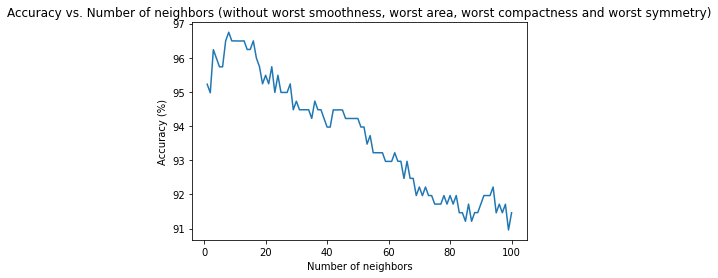

In [ ]:
#Drop radius error, area error, smoothness error
scaled_X_train_ras = np.delete(scaled_X_train, [10,13,14], axis=1)
#print(scaled_X_train_tcc.shape)

#Train
acc_max_ras= 0
k_max_ras = 0

 #for loop to sweep k from 1 to 100
accuracy_ras = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(scaled_X_train_ras, y_train)
  scores_ras = cross_val_score(knn, scaled_X_train_ras, y_train, cv=5)
  accuracy_ras[i] = scores_ras.mean()*100
  print(i+1, accuracy_ras[i])
  if accuracy_ras[i] > acc_max_ras:
    acc_max_ras = accuracy_ras[i]
    k_max_ras = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_ras,".", "The maximum accuracy is: ", acc_max_ras, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_ras)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)")

1 95.48417721518987
2 94.7215189873418
3 96.7373417721519
4 96.23734177215188
5 96.24050632911393
6 96.23734177215188
7 96.49367088607596
8 96.74683544303797
9 96.74367088607593
10 96.74367088607593
11 96.49050632911391
12 96.74367088607593
13 96.24050632911393
14 95.99050632911393
15 95.7373417721519
16 95.99050632911393
17 95.98734177215191
18 96.24050632911393
19 95.98734177215191
20 95.7373417721519
21 95.48734177215191
22 95.7373417721519
23 95.48734177215191
24 95.74050632911393
25 95.2373417721519
26 95.2373417721519
27 95.23417721518987
28 95.48734177215191
29 95.23417721518987
30 95.48734177215191
31 95.23417721518987
32 95.48734177215191
33 95.48734177215191
34 95.48734177215191
35 95.7373417721519
36 95.7373417721519
37 95.7373417721519
38 95.7373417721519
39 95.48417721518987
40 95.7373417721519
41 95.23101265822784
42 95.23101265822784
43 94.97784810126582
44 95.48417721518987
45 94.97784810126582
46 94.97784810126582
47 94.72468354430379
48 94.72468354430379
49 94.4715189

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)')

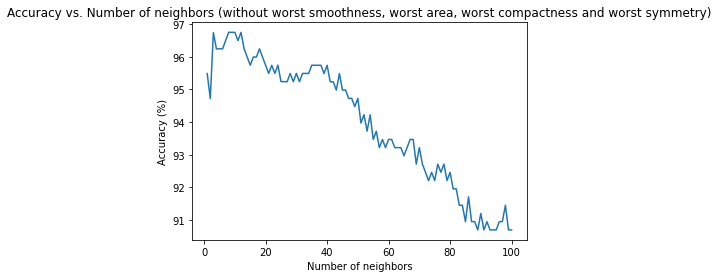

In [ ]:
#Drop texture error, compactness error, concavity error, concave points error
scaled_X_train_tccc = np.delete(scaled_X_train, [11,15,16,17], axis=1)
#print(scaled_X_train_tcc.shape)

#Train
acc_max_tccc= 0
k_max_tccc = 0

 #for loop to sweep k from 1 to 100
accuracy_tccc = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(scaled_X_train_tccc, y_train)
  scores_tccc = cross_val_score(knn, scaled_X_train_tccc, y_train, cv=5)
  accuracy_tccc[i] = scores_tccc.mean()*100
  print(i+1, accuracy_tccc[i])
  if accuracy_tccc[i] > acc_max_tccc:
    acc_max_tccc = accuracy_tccc[i]
    k_max_tccc = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_tccc,".", "The maximum accuracy is: ", acc_max_tccc, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_tccc)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)")

1 95.47468354430379
2 94.46835443037976
3 96.73417721518987
4 96.4873417721519
5 95.9873417721519
6 95.73417721518986
7 95.7373417721519
8 95.99050632911393
9 96.24050632911393
10 96.74683544303798
11 96.24050632911393
12 96.24050632911393
13 95.99050632911393
14 96.24367088607595
15 95.7373417721519
16 95.99050632911393
17 95.48417721518987
18 95.99050632911393
19 95.99050632911393
20 95.99050632911393
21 95.7373417721519
22 95.7373417721519
23 95.7373417721519
24 95.99050632911393
25 95.2373417721519
26 95.48734177215191
27 94.9873417721519
28 95.48734177215191
29 94.73417721518986
30 95.2373417721519
31 94.98417721518987
32 95.2373417721519
33 94.98417721518987
34 95.2373417721519
35 95.2373417721519
36 95.2373417721519
37 95.2373417721519
38 95.2373417721519
39 94.98417721518987
40 94.98417721518987
41 94.72784810126582
42 95.23417721518987
43 94.98101265822785
44 94.98101265822785
45 94.97784810126582
46 94.72784810126582
47 94.22151898734178
48 94.22151898734178
49 94.47151898734

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)')

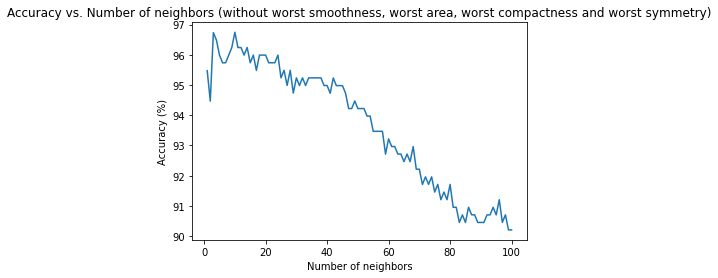

In [ ]:
#Drop texture error, compactness error, concavity error, fractal dimension error
scaled_X_train_tccf = np.delete(scaled_X_train, [11,15,16,19], axis=1)
#print(scaled_X_train_tcc.shape)

#Train
acc_max_tccf= 0
k_max_tccf = 0

 #for loop to sweep k from 1 to 100
accuracy_tccf = np.zeros(100)
k = np.arange(1,101,1)

for i in range (0,100):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(scaled_X_train_tccf, y_train)
  scores_tccf = cross_val_score(knn, scaled_X_train_tccf, y_train, cv=5)
  accuracy_tccf[i] = scores_tccf.mean()*100
  print(i+1, accuracy_tccf[i])
  if accuracy_tccf[i] > acc_max_tccf:
    acc_max_tccf = accuracy_tccf[i]
    k_max_tccf = i+1

#Print optimal k and maximum accuracy
print("The optimal k value is: ", k_max_tccf,".", "The maximum accuracy is: ", acc_max_tccf, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_tccf)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors (without worst smoothness, worst area, worst compactness and worst symmetry)")


2. Does standardization lead to better model performance? Is performance better or worst? Discuss. **[1]**

*Looking at Table2 above, it is observed that standardization did lead to a better model performance. It is also observed that standardization reduced the effect that number of removed features has on the train accuracy. Previously in part2, we can see that as the number of features removed surpass 2, the accuracy decreases. Here, the accuracy when 4 features were removed is the same as that when 2 features were removed.*

## Part 4: Test Data [1 Mark]

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss. **[1]**

*From results of Part 3, it is obvious that standardized data lead to a better performance. However, whether or not removing features did not lead to huge performance improvement. Therefore, standardized & non-reduced data was used here for testing.*

In [ ]:
 #Predicting using test dataset
 from sklearn.metrics import accuracy_score

 knn_sd = neighbors.KNeighborsClassifier(n_neighbors=10)
 knn_sd.fit(scaled_X_train, y_train)
 scores_pt4 = accuracy_score(y_test, knn_sd.predict(scaled_X_test))
 print ("The test accuracy is: % 0.2f(+/- %0.2f)" % (scores_pt4.mean()*100, scores_pt4.std()*2*100),"%" )

The test accuracy is:  95.91(+/- 0.00) %


## Part 5: New Dataset [4 Marks]
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset. **[1]**
*   Create a KNN classifier using the tools you've learned. **[2]**
*   Present your results. **[1]**

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

In [ ]:
#Import wine recognition dataset
from sklearn.datasets import load_wine
dataset2 = load_wine()
#dataset2

In [ ]:
#Putting the data into a dataframe

df_wine = pd.DataFrame(data=dataset2['data'], columns=dataset2['feature_names'])
target2_list = dataset2['target'].tolist()
df_wine['target'] = target2_list
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
Xwine_train, Xwine_test, ywine_train, ywine_test = train_test_split(dataset2['data'], target2_list, test_size=0.3, random_state=0)

1 74.9
2 69.43333333333332
3 69.3
4 66.83333333333333
5 62.83333333333334
6 64.4
7 64.43333333333334
8 64.39999999999999
9 66.83333333333333
10 65.23333333333332
11 62.8
12 65.26666666666667
13 66.03333333333332
14 68.5
15 68.46666666666667
16 66.10000000000001
17 63.63333333333333
18 70.16666666666667
19 69.33333333333333
20 69.39999999999999
21 69.39999999999999
22 70.16666666666667
23 71.0
24 71.0
25 70.16666666666667
26 70.96666666666667
27 70.96666666666667
28 70.96666666666667
29 70.16666666666667
30 70.16666666666667
31 70.16666666666667
32 70.96666666666667
33 71.76666666666667
34 70.96666666666667
35 70.96666666666667
36 70.96666666666667
37 70.96666666666667
38 70.96666666666667
39 71.76666666666667
40 70.96666666666667
41 70.16666666666667
42 70.16666666666667
43 70.16666666666667
44 70.16666666666667
45 70.16666666666667
46 69.36666666666666
47 70.13333333333333
48 66.86666666666666
49 67.7
50 65.26666666666668
51 65.26666666666668
52 66.86666666666666
53 69.33333333333334


Text(0.5, 1.0, 'Accuracy vs. Number of neighbors')

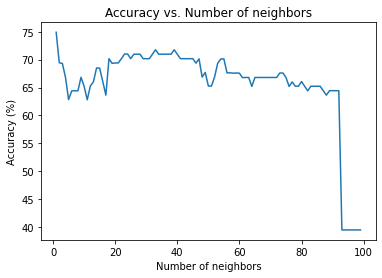

In [ ]:
#Predict with non-standardized & non-reduced data
acc_max_pt5 = 0
k_max_pt5 = 0

#for loop to sweep k from 1 to 99
#expected n_neighbors <= n_samples, n_samples = 99 here

accuracy_pt5 = np.zeros(99)
k = np.arange(1,100,1)

for i in range (0,99):
  knn_pt5 = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn_pt5.fit(Xwine_train, ywine_train)
  scores = cross_val_score(knn_pt5, Xwine_train, ywine_train, cv=5)
  accuracy_pt5[i] = scores.mean()*100
  print(i+1, accuracy_pt5[i])
  if accuracy_pt5[i] > acc_max_pt5:
    acc_max_pt5 = accuracy_pt5[i]
    k_max_pt5 = i+1

print("The optimal k value is: ", k_max_pt5,".", "The maximum accuracy is: ", acc_max_pt5, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_pt5)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors")


In [ ]:
 #Predicting using test dataset

 knn_pt5 = neighbors.KNeighborsClassifier(n_neighbors=1)
 knn_pt5.fit(Xwine_train, ywine_train)
 scores_pt5 = accuracy_score(ywine_test, knn_pt5.predict(Xwine_test))
 print ("The test accuracy is: % 0.2f(+/- %0.2f)" % (scores_pt5.mean()*100, scores_pt5.std()*2*100),"%" )

The test accuracy is:  75.93(+/- 0.00) %


1 96.0
2 93.6
3 93.53333333333333
4 94.36666666666666
5 96.73333333333333
6 95.13333333333334
7 95.96666666666665
8 95.16666666666666
9 96.76666666666665
10 95.16666666666666
11 96.76666666666665
12 94.33333333333334
13 94.33333333333334
14 94.33333333333334
15 95.16666666666666
16 95.96666666666665
17 96.76666666666665
18 97.6
19 97.6
20 97.6
21 97.6
22 97.6
23 97.6
24 97.6
25 97.6
26 96.0
27 96.8
28 95.16666666666666
29 97.6
30 96.8
31 97.6
32 97.6
33 97.6
34 96.76666666666665
35 97.6
36 97.6
37 96.76666666666665
38 96.0
39 96.0
40 96.0
41 95.19999999999999
42 95.19999999999999
43 95.19999999999999
44 95.19999999999999
45 95.19999999999999
46 96.0
47 96.0
48 95.19999999999999
49 96.0
50 94.36666666666666
51 95.16666666666666
52 94.36666666666666
53 96.0
54 96.0
55 96.0
56 96.0
57 96.0
58 95.19999999999999
59 93.6
60 93.6
61 92.0
62 90.39999999999999
63 88.80000000000001
64 87.20000000000002
65 85.60000000000001
66 82.4
67 80.80000000000001
68 79.16666666666667
69 76.70000000000002
70

Text(0.5, 1.0, 'Accuracy vs. Number of neighbors')

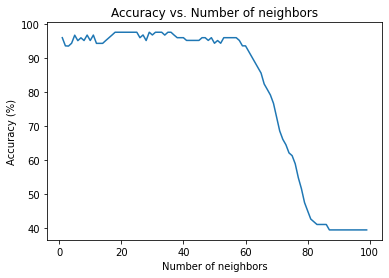

In [ ]:
#Predict with standardized & non-reduced data

#Standardizing the entire training dataset
scaled_Xwine_train = StandardScaler().fit_transform(Xwine_train)
df_sd_winetrain = pd.DataFrame(data=scaled_Xwine_train, columns=dataset2['feature_names'])
df_sd_winetrain['target']=ywine_train
#df_sd_winetrain

#Standardizing the entire testing dataset
scaler = StandardScaler().fit(Xwine_train)
scaled_Xwine_test = scaler.transform(Xwine_test)
df_sd_winetest =  pd.DataFrame(scaled_Xwine_test, columns=dataset2['feature_names'])
df_sd_winetest['target']=ywine_test
#df_sd_winetest

#for loop to sweep k from 1 to 99
#expected n_neighbors <= n_samples, n_samples = 99 here

acc_max_pt6 = 0
k_max_pt6 = 0
accuracy_pt6 = np.zeros(99)
k = np.arange(1,100,1)

for i in range (0,99):
  knn_pt6 = neighbors.KNeighborsClassifier(n_neighbors=i+1)
  knn_pt6.fit(scaled_Xwine_train, ywine_train)
  scores = cross_val_score(knn_pt6, scaled_Xwine_train, ywine_train, cv=5)
  accuracy_pt6[i] = scores.mean()*100
  print(i+1, accuracy_pt6[i])
  if accuracy_pt6[i] > acc_max_pt6:
    acc_max_pt6 = accuracy_pt6[i]
    k_max_pt6 = i+1

print("The optimal k value is: ", k_max_pt6,".", "The maximum accuracy is: ", acc_max_pt6, "%.")

#Plotting Accuracy vs. Number of neighbors
plt.plot(k, accuracy_pt6)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of neighbors")


In [ ]:
 #Predicting using test dataset

 knn_pt6 = neighbors.KNeighborsClassifier(n_neighbors=18)
 knn_pt6.fit(scaled_Xwine_train, ywine_train)
 scores_pt6 = accuracy_score(ywine_test, knn_pt6.predict(scaled_Xwine_test))
 print ("The test accuracy is: % 0.2f(+/- %0.2f)" % (scores_pt6.mean()*100, scores_pt6.std()*2*100),"%" )

The test accuracy is:  100.00(+/- 0.00) %


*Since this model is able to predict the class of wine with a 100% test accuracy, it is considered to be the best model. Thus there is no need for reducing the data by dropping certain features. Moreover, since the original dataset is relatively small, there is no need for reducing the data further.*